In [ ]:
!pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13163 sha256=cf2bed5acaa535d9e1103086529a2ef8a8b47062a6292820b439d46e0dbbfcbf
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as m
import ppscore as ps


In [2]:
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)
print("matplotlib version:", m.__version__)
print("ppscore version:", ps.__version__)

numpy version: 1.26.0
pandas version: 1.5.3
seaborn version: 0.12.2
matplotlib version: 3.7.2
ppscore version: 1.3.0


# 1. Load data

## Import data

In [4]:
df =  pd.read_csv("./data/Salary.csv") #read file cars.csv
df.head(15)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45,Male,3,Manager,15.0,150000,Canada,White,1
3,36,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52,Male,2,Director,20.0,200000,USA,Asian,0
5,29,Male,1,Marketing Analyst,2.0,55000,USA,Hispanic,0
6,42,Female,2,Product Manager,12.0,120000,USA,Asian,0
7,31,Male,1,Sales Manager,4.0,80000,China,Korean,0
8,26,Female,1,Marketing Coordinator,1.0,45000,China,Chinese,0
9,38,Male,3,Scientist,10.0,110000,Australia,Australian,1


## Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   int64  
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   int64  
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 470.1+ KB


In [ ]:
df.describe()

,Age,Education Level,Years of Experience,Salary,Senior
count,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000
mean,33.610563,1.622382,8.077723,115307.175194,0.143477
std,7.595994,0.880474,6.029305,52806.810881,0.350585
min,21.000000,0.000000,0.000000,350.000000,0.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000
max,62.000000,3.000000,34.000000,250000.000000,1.000000


In [ ]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race', 'Senior'],
      dtype='object')

In [ ]:
# Categorize list of features into numerical and categorical features
categorical_column = df.select_dtypes(include=object).columns.tolist()
numerical_column = df.select_dtypes(exclude=object).columns.tolist()
print("The features displaying numerical value:", numerical_column)
print("The features displaying categorical value:", categorical_column)

The features displaying numerical value: ['Age', 'Education Level', 'Years of Experience', 'Salary', 'Senior']
The features displaying categorical value: ['Gender', 'Job Title', 'Country', 'Race']


In [ ]:
#Check number of unique in each categorical features
for i in categorical_column:
    print(i, ":", len(df[i].unique()))

Gender : 2
Job Title : 129
Country : 5
Race : 10


# 2. EDA

## Explore data

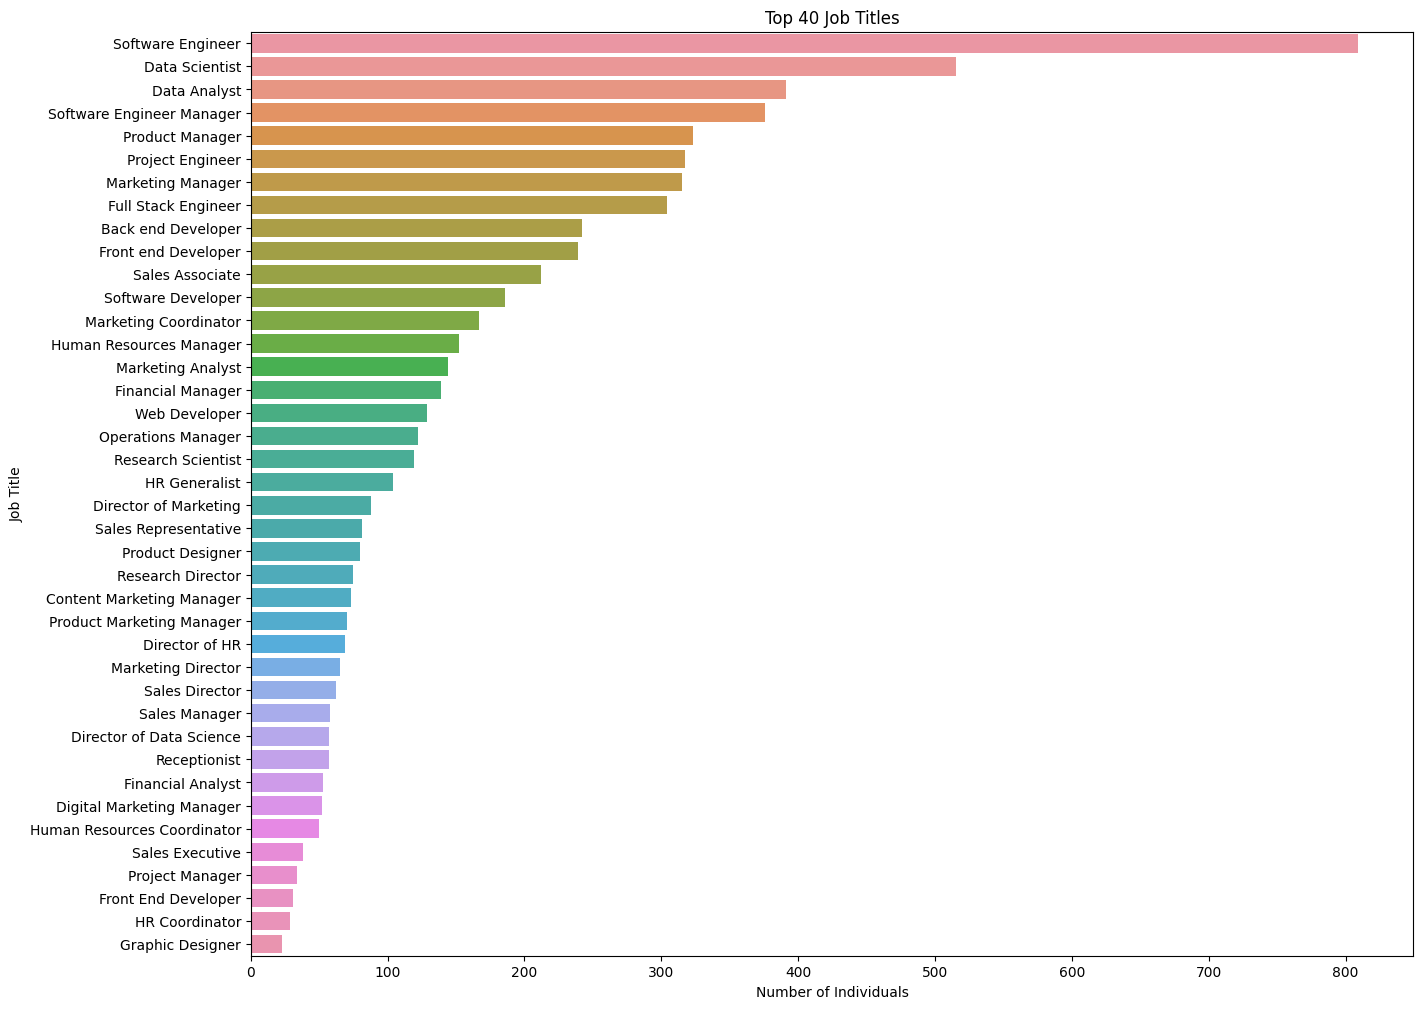

In [ ]:
# Selecting the top 40 most frequent job titles
top_job_titles = df['Job Title'].value_counts().head(40)

plt.figure(figsize=(15, 12))  # Adjusting the figure size for better visibility
sns.barplot(x=top_job_titles, y=top_job_titles.index)
plt.title('Top 40 Job Titles')
plt.xlabel('Number of Individuals')
plt.ylabel('Job Title')
plt.show()

The chart analysis reveals a tech-centric dataset with a prevalence of software and data-related roles. Management positions are also well-represented, indicating the inclusion of leadership roles. The presence of diverse functions such as marketing, finance, and human resources suggests a broad organizational scope. There is an opportunity for data standardization, especially in consolidating similar job titles. These insights are valuable for HR strategy, recruitment, and further labor market analysis.

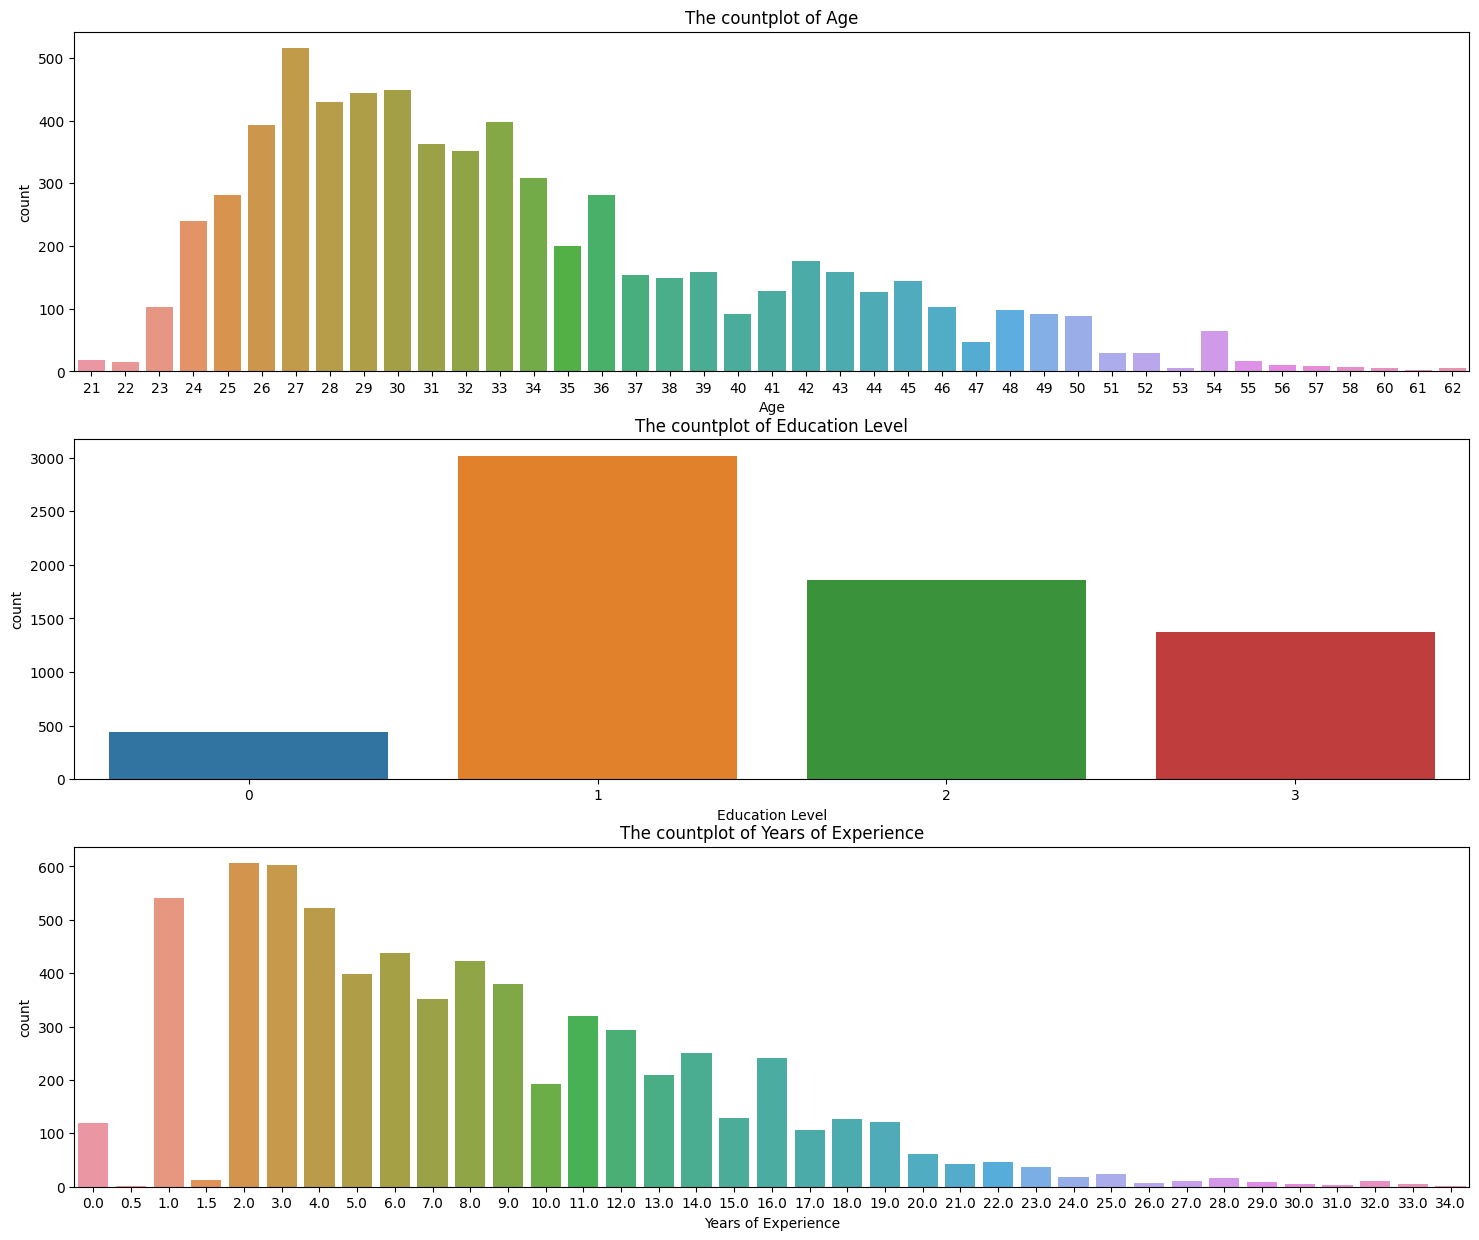

In [ ]:
# Display counterplot in age, education and years of experience to display distribution
fig, ax = plt.subplots(3, figsize = (18,15))
for i, j  in enumerate(["Age", "Education Level", "Years of Experience"]):
    ax[i].set_title("The countplot of {}".format(j))
    sns.countplot(data = df, x = j, ax = ax[i])

Age Distribution: The age distribution appears to be right-skewed, suggesting a younger workforce. Most individuals are in their late 20s to early 30s. The representation decreases with age, which is typical in many industries, especially those that are tech-focused.

Education Level: The education levels are categorical and seem to be represented by integers (possibly codes for different levels of education). There is a predominant category (possibly representing a bachelor's degree or equivalent), which has the highest count, indicating that most individuals in the dataset have this level of education. The other categories have significantly fewer counts, which could represent higher or possibly lower education levels.

Years of Experience: This distribution is also right-skewed, with a large number of individuals having less than 10 years of experience. The frequency decreases as the years of experience increase, which aligns with typical workforce trends where entry and mid-level positions are more common than senior positions.

<Axes: title={'center': 'The countplot of gender'}, xlabel='Gender', ylabel='count'>

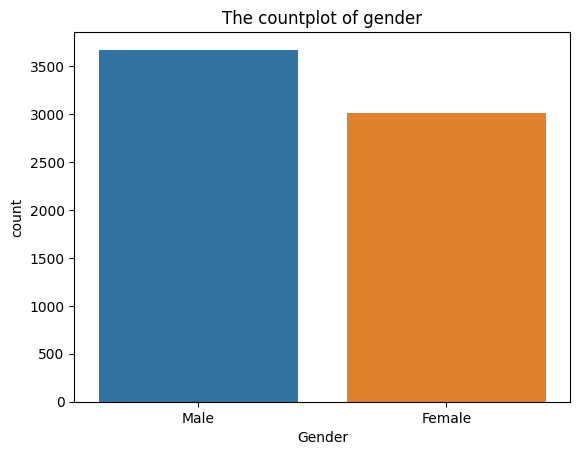

In [ ]:
# Display counterplot of gender
plt.title("The countplot of gender")
sns.countplot(data = df, x = "Gender")

The dataset contains a higher count of males compared to females.
This could indicate a gender disparity within the dataset's context, which might reflect the actual situation in the relevant industry or organization, or it could be a result of sampling bias during data collection.

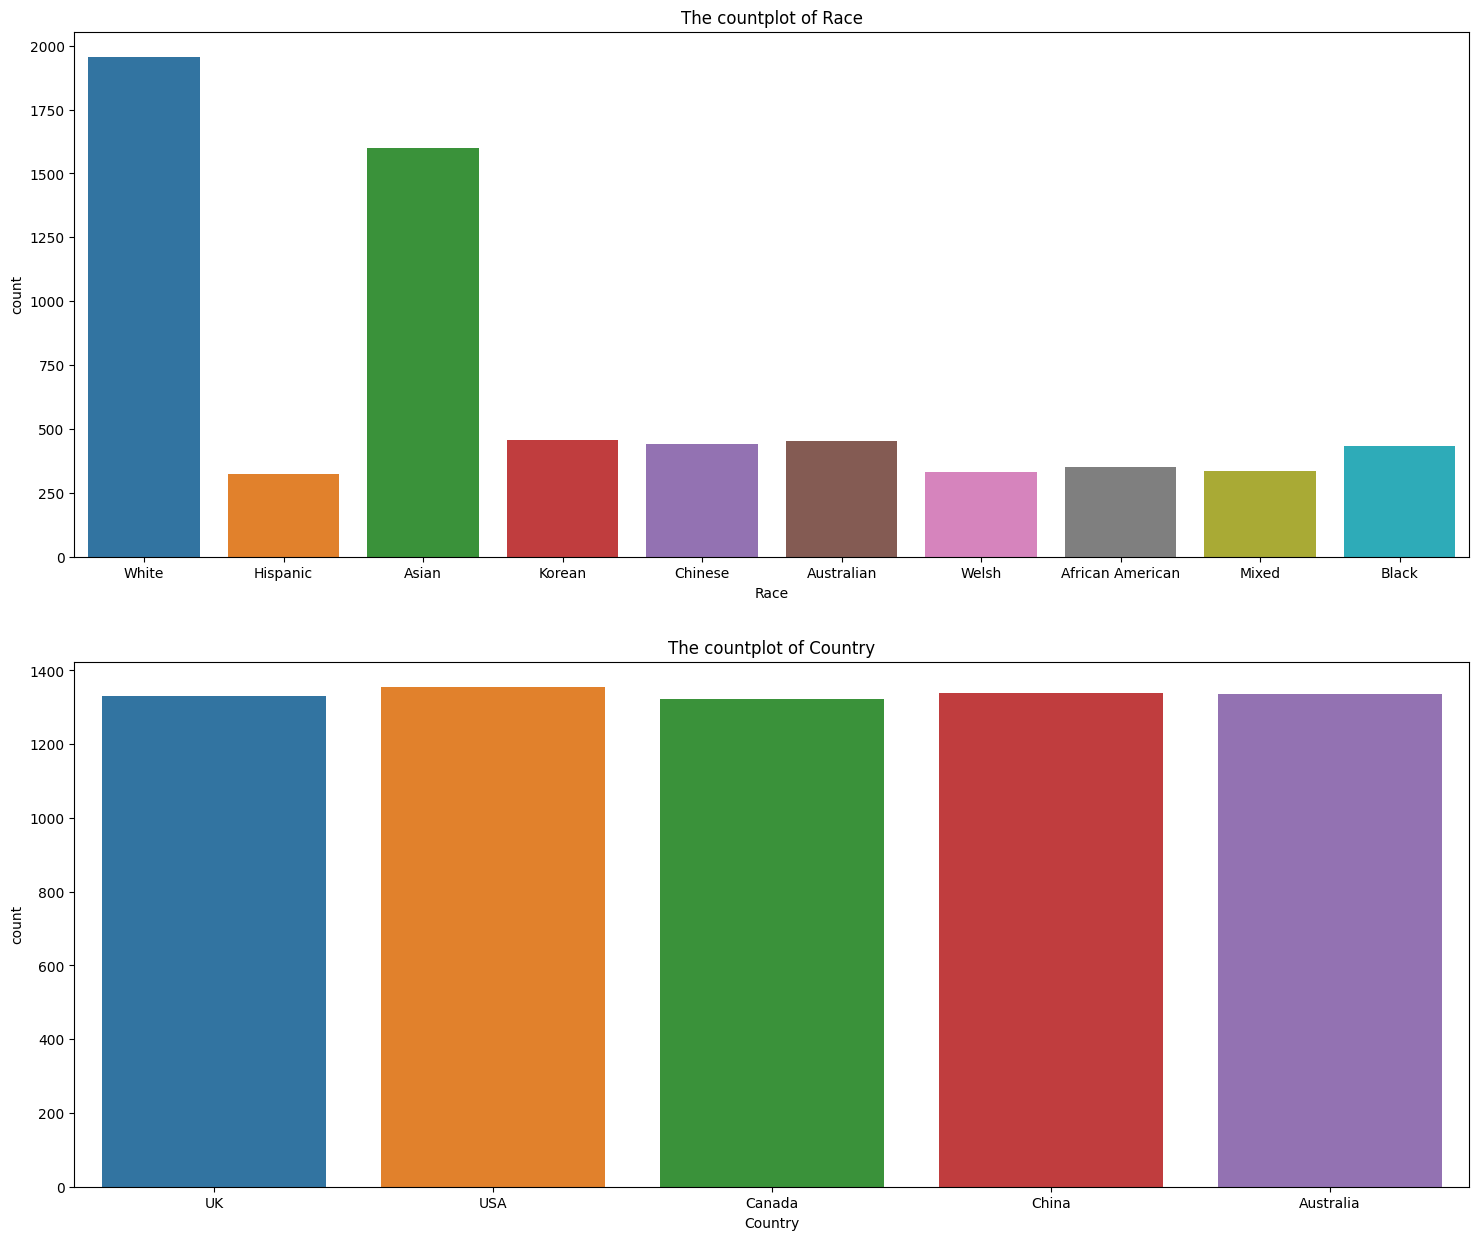

In [ ]:
# Display counterplot for race and country to display distribution
fig, ax = plt.subplots(2, figsize = (18,15))
for i, j  in enumerate(["Race", "Country"]):
    ax[i].set_title("The countplot of {}".format(j))
    sns.countplot(data = df, x = j, ax = ax[i])

Race Distribution:

The 'Race' countplot reveals a majority of individuals identified as 'White'. This suggests that the dataset may be predominantly representing this racial group.
Other racial groups such as 'Korean', 'Yemeni', 'Chinese', and 'African American' have a presence but to a lesser extent, which might indicate diversity within the dataset, albeit with a smaller representation. Also another fact is Korean or Chiense people can also be considered as 'Asian' too - which has a significant presence after 'White'.

Country Distribution:

The 'Country' countplot indicates a significant number of individuals from the 'USA', followed closely by 'UK', 'Canada', 'China', and 'Australia'.
The dataset seems to have a broad international representation, with a slight predominance of individuals from English-speaking countries.
This international diversity could be useful for global market analysis or multinational workforce planning.

<Axes: title={'center': 'The countplot of Senior'}, xlabel='Senior', ylabel='count'>

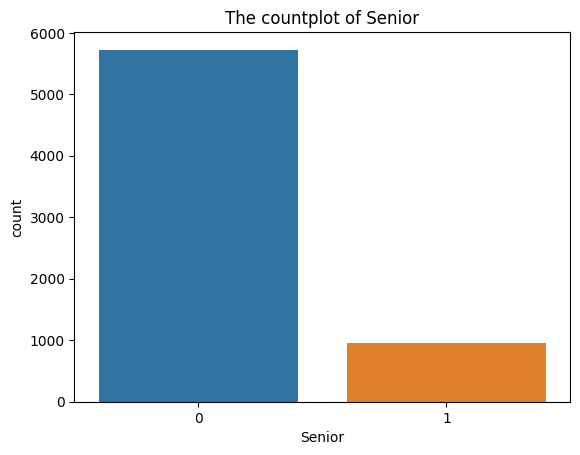

In [ ]:
# Display counterplot of senior
plt.title("The countplot of Senior")
sns.countplot(data = df, x = "Senior")


The countplot for the 'Senior' column in the dataset indicates a significant majority of individuals categorized as non-senior (likely represented by '0'), while a smaller portion is identified as senior (represented by '1'). This distribution reflects a common organizational structure, where junior or mid-level roles outnumber senior positions.

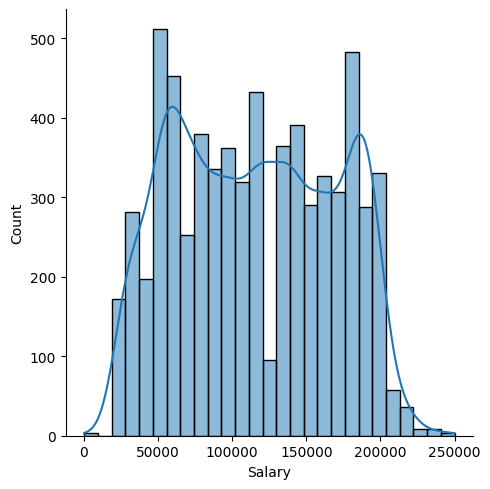

In [ ]:
# Display distribution of salary from all professionals.
sns.displot(data = df, x = "Salary", kde = True)

The distribution plot for 'Salary' with a Kernel Density Estimate (KDE) overlay provides several key insights:

Multi-modal Distribution: This shows a multi-modal distribution, with several peaks, suggesting the presence of different groups within the dataset that have distinct salary ranges.

Primary Peak: The most prominent peak occurs at the lower end of the salary range, indicating that the largest number of individuals earn within this lower salary bracket.

Secondary Peaks: There are additional, less prominent peaks further along the salary axis, which suggest clusters of individuals earning higher salaries. These could represent different levels of seniority, specialized skills, or job roles that command higher pay.

Outliers: The presence of outliers on the higher end is also suggested by the long tail of the histogram. These could be individuals in very high-paying roles or with exceptional compensation packages.

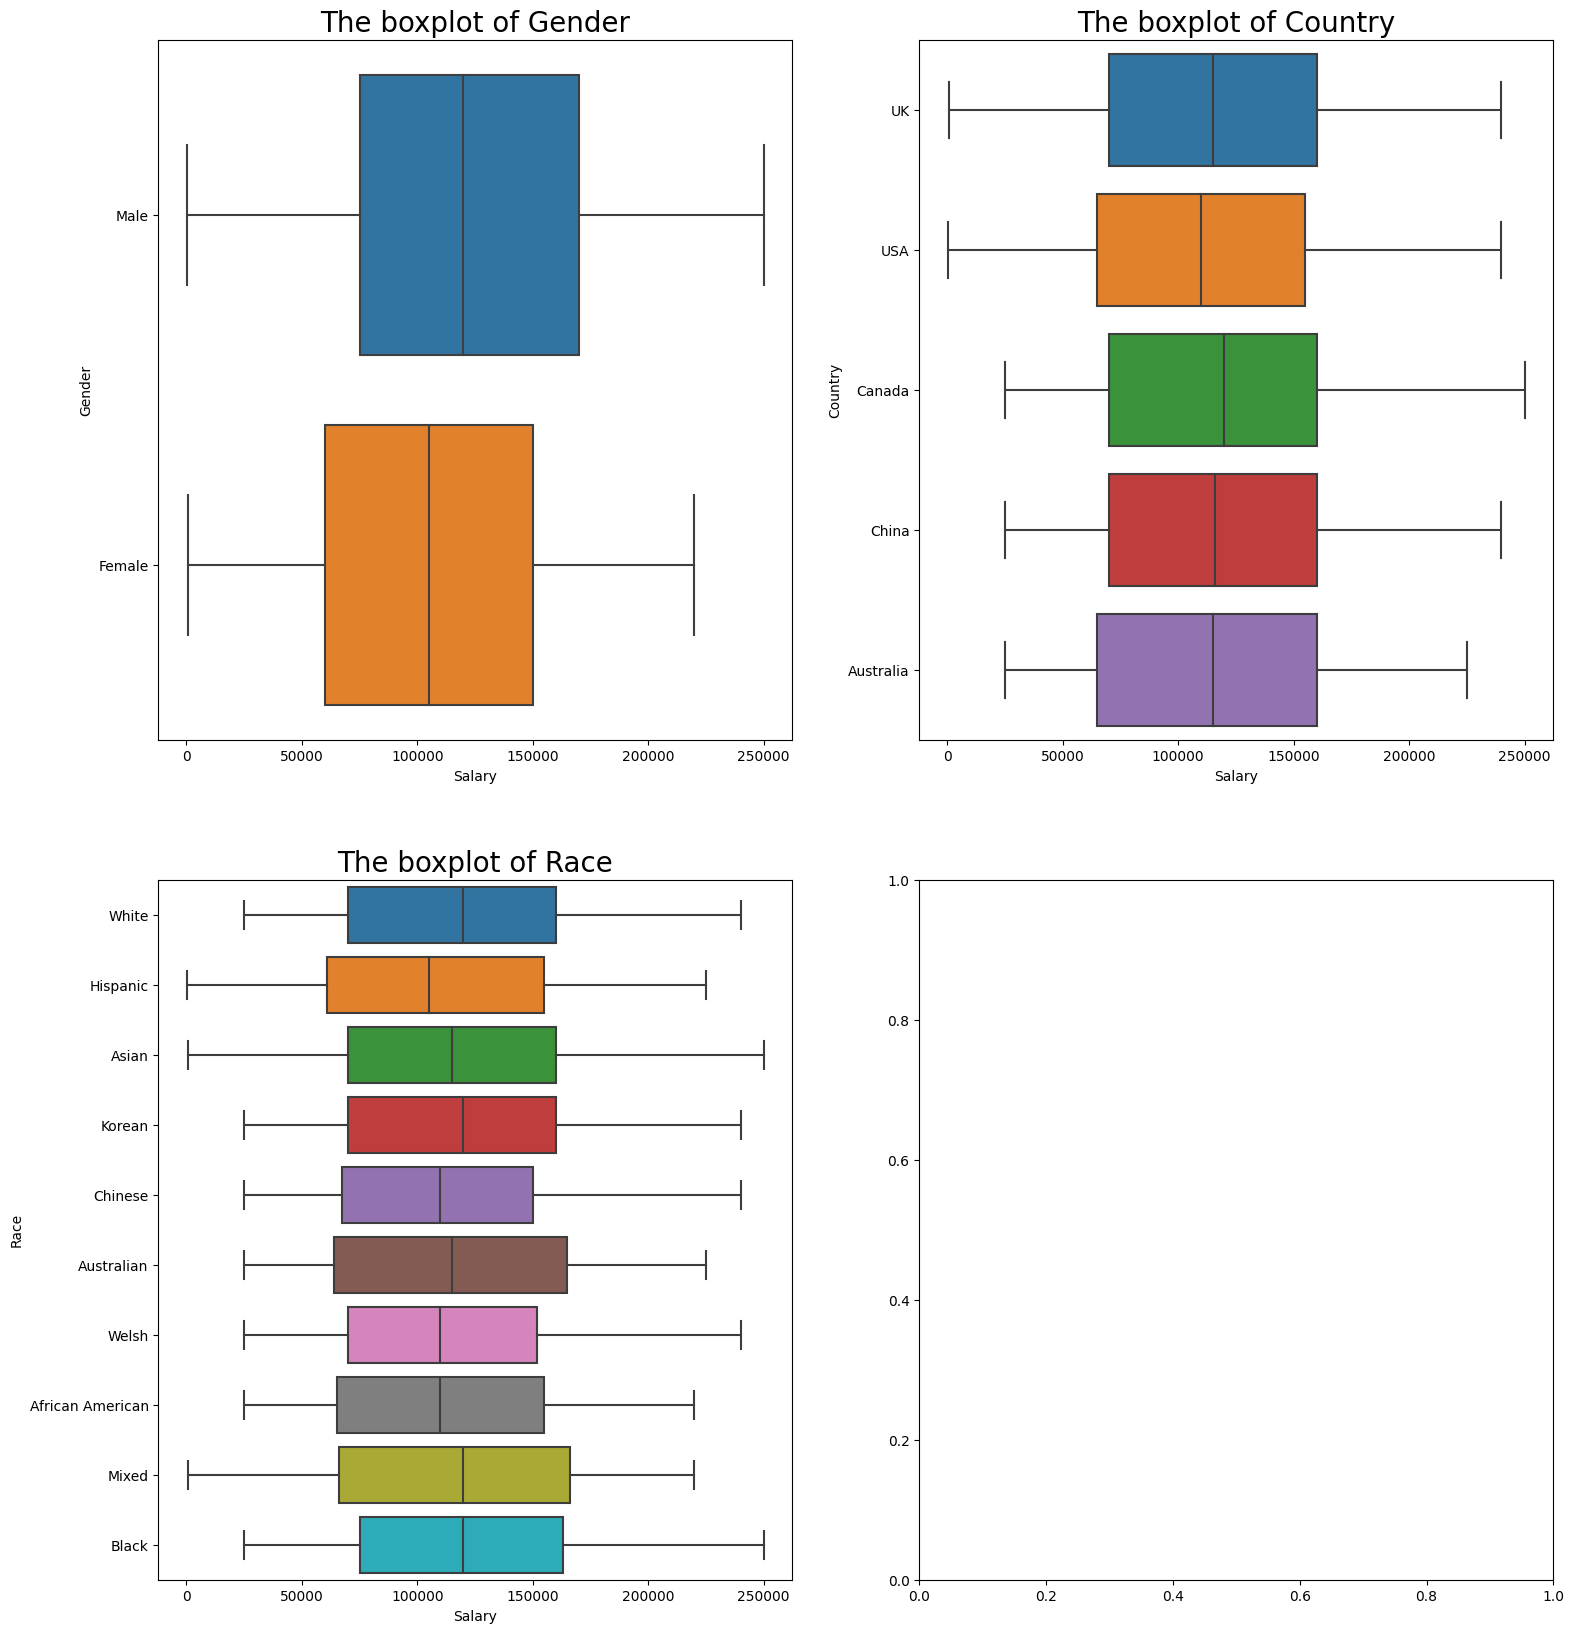

In [ ]:
# The boxplot of salary in each gender, country, and race.
fig, ax = plt.subplots(2, 2, figsize = (18,20))
for i, j  in enumerate(["Gender", "Country", "Race"]):
    ax[i//2, i%2].set_title("The boxplot of {}".format(j), fontsize = 20)
    sns.boxplot(data = df, x = "Salary", y = j,ax = ax[i//2, i%2])


Gender:

The boxplot shows that the median salary for males is slightly higher than for females, indicated by the median line within the box.
Both genders have a wide range of salaries, as shown by the span of the boxes and whiskers, suggesting variability in pay within each gender group.
Outliers, or points beyond the whiskers, can indicate exceptional cases where individuals earn significantly more than the typical range.

Country:

The salary distribution varies by country, with some countries showing a higher median salary and a wider interquartile range, which may indicate a higher cost of living or a different economic context.
Certain countries may exhibit more variability in salaries than others, as suggested by the length of the boxes and whiskers.
Outliers are present in the salary data for some countries, which could reflect expatriate compensation or highly specialized roles.


Race:

There are noticeable differences in salary medians across racial groups. Some groups have higher medians, while others are lower, which might indicate economic disparities or represent the demographic's distribution across different industries or job levels.
The spread of the data for each racial group, as seen in the height of the boxes, varies, suggesting that salary equity and standard of living can differ significantly within each group.
Racial groups also exhibit outliers in salary, indicating that there are individuals who earn well above the typical range for their group.

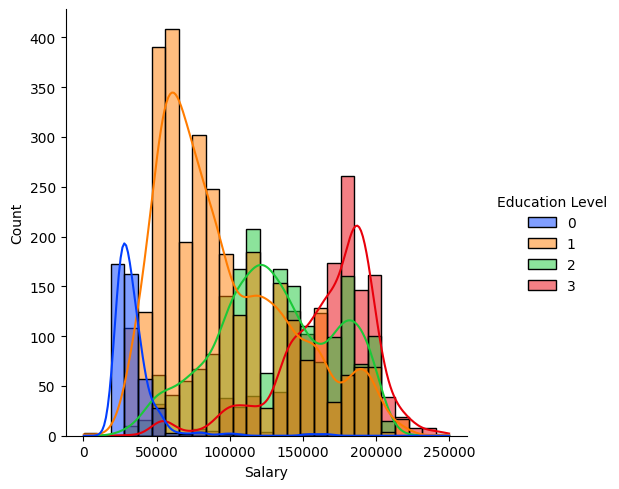

In [ ]:
sns.displot(data = df, x = "Salary", hue = "Education Level", palette = 'bright', kde = True)

Education Level Influence:

The plot suggests a variation in salary distribution across different education levels. Some levels have a higher median salary, while others are concentrated at the lower end of the salary spectrum.

Salary Distribution Shape:

The salary distributions for each education level 0 and 1 appear to be right-skewed, indicating that for these education categories, there are fewer individuals with high salaries. On the other hand the ones with more education level appear to be left skewed meaning more salary.

Kernel Density Estimation (KDE):

The KDE lines provide a smooth estimate of the salary distribution for each education level. It seems that certain education levels(eg 1) have a more pronounced peak, suggesting a more concentrated salary range.

Overlap Between Education Levels:

There is some overlap in the salary ranges between different education levels, which may indicate that factors other than education influence salary.

In [ ]:
for i in range(4):
    filter_senior = df[df["Education Level"] == i]
    mean_salary = filter_senior["Salary"].mean()
    median_salary = filter_senior["Salary"].median()
    print("Average of salary from education level {}:".format(i), mean_salary)
    print("Median of salary from education level {}:".format(i), median_salary)

Average of salary from education level 0: 34415.6123853211
Median of salary from education level 0: 30000.0
Average of salary from education level 1: 95082.90863952333
Median of salary from education level 1: 80000.0
Average of salary from education level 2: 130078.38482238966
Median of salary from education level 2: 130000.0
Average of salary from education level 3: 165651.4579985391
Median of salary from education level 3: 170000.0


From information of distribution, if eduction level is higher, there is a chance that, employess with higher degree gets large salary.

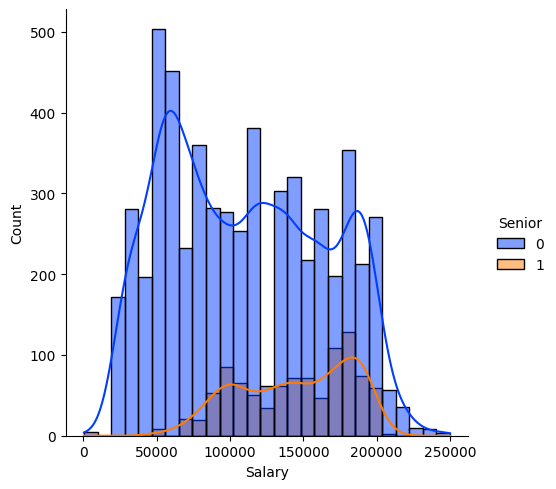

In [ ]:
sns.displot(data = df, x = "Salary", hue = "Senior", palette = 'bright', kde = True)

In [ ]:
for i in range(2):
    filter_senior = df[df["Senior"] == i]
    mean_salary = filter_senior["Salary"].mean()
    median_salary = filter_senior["Salary"].median()
    print("Average of salary from senior {}:".format(i), mean_salary)
    print("Median of salary from senior {}:".format(i), median_salary)

Average of salary from senior 0: 110474.12139737992
Median of salary from senior 0: 110000.0
Average of salary from senior 1: 144159.3472367049
Median of salary from senior 1: 150000.0


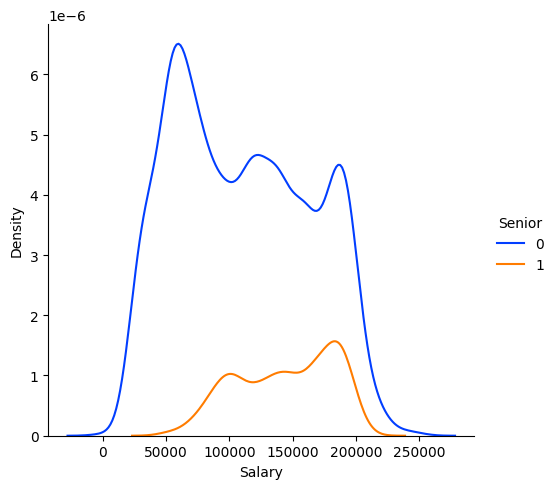

In [ ]:
sns.displot(data = df, x = "Salary", hue = "Senior", palette = 'bright', kind = 'kde')

Seniority Salary Gap: There is a visible distinction between the salary distributions of senior (1) and non-senior (0) employees. The plot suggests that senior employees generally have higher salaries, as indicated by the rightward shift of their distribution.

Salary Distribution Shape: Right skewness appears more pronounced for non-senior employees. This is a common pattern, with a large number of employees earning around the median salary for their group and fewer individuals earning significantly higher amounts.

Kernel Density Estimation (KDE): The KDE curves help visualize the probability density of salaries within each group. The senior group's KDE curve peaks at a higher salary range compared to the non-senior group, reinforcing the notion that senior roles tend to be higher-paying.

Overlap and Variability: There is some overlap in the salary ranges, indicating that there is a subset of non-senior employees with salaries that encroach into the senior salary range. This could be due to various factors, including industry, geography, or the presence of highly specialized non-senior roles.

From information, if employees is senior, there is a chance that employess receive higher salary than not being senior.

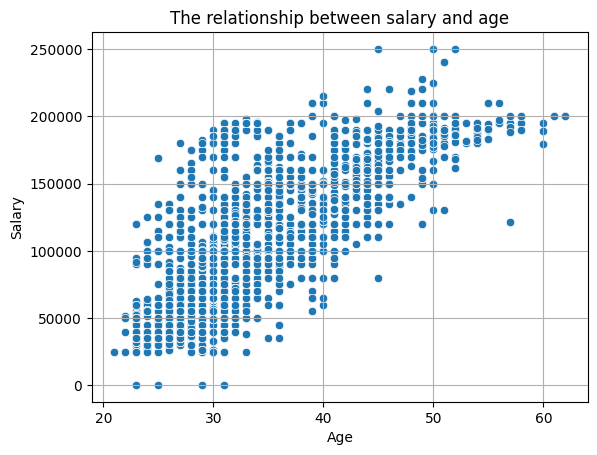

In [ ]:
sns.scatterplot(data = df, x = "Age", y ='Salary')
plt.title("The relationship between salary and age")
plt.grid()

The scatterplot suggests a trend where salaries tend to increase with age, reflecting career growth. There is considerable variation at each age level, indicating that age is not the sole determinant of salary. Outliers suggest exceptionally high earners, and the overall pattern can inform strategies on career progression and compensation.


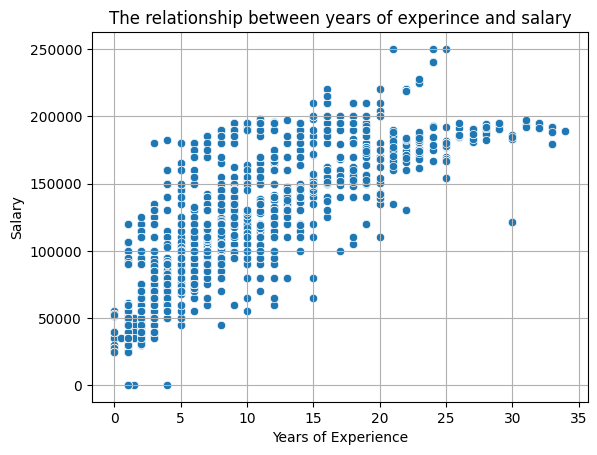

In [ ]:
sns.scatterplot(data = df, x = "Years of Experience", y ='Salary')
plt.title("The relationship between years of experince and salary")
plt.grid()

The scatterplot between 'Years of Experience' and 'Salary' indicates a positive correlation where salary generally increases with the years of experience. The spread of data points suggests that experience is a significant factor in salary determination, but also that there is a wide range of salaries at almost any level of experience. This implies the influence of other variables such as job role, industry, or education on salary, beyond just years of experience. The visualization supports the idea that investing in career development can be financially beneficial over time.

In [ ]:
df.head(20)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45,Male,3,Manager,15.0,150000,Canada,White,1
3,36,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52,Male,2,Director,20.0,200000,USA,Asian,0
5,29,Male,1,Marketing Analyst,2.0,55000,USA,Hispanic,0
6,42,Female,2,Product Manager,12.0,120000,USA,Asian,0
7,31,Male,1,Sales Manager,4.0,80000,China,Korean,0
8,26,Female,1,Marketing Coordinator,1.0,45000,China,Chinese,0
9,38,Male,3,Scientist,10.0,110000,Australia,Australian,1


In [ ]:
dict_match_job_title = {'Account Executive': 'Account Manager',
                        'Customer Service Representative': 'Customer Service Rep',
                        'Human Resources Manager': 'HR Manager',
                        'Human Resources Coordinator': 'HR Coordinator',
                        'Juniour HR Coordinator': 'HR Coordinator',
                        'HR Specialist': 'HR Coordinator',
                        'Human Resources Specialist': 'HR Coordinator',
                        'Juniour HR Generalist': 'HR Generalist',
                        'IT Project Manager': 'IT Manager',
                        'IT Support Specialist': 'IT Support',
                        'Director of Marketing': 'Marketing Director',
                        'Director of Sales': 'Sales Director',
                        'Director of HR': 'Human Resources Director',
                        'Director of Human Resources': 'Human Resources Director',
                        'Director of Operations': 'Operations Director',
                        'VP of Operations': 'Operations Director',
                        'VP of Finance': 'Director of Finance',
                        'Product Development Manager': 'Product Manager',
                        'Office Manager': 'Manager', 'Sales Operations Manager': "Sales Manager",
                        'Software Engineer Manager': 'Software Manager',
                        'Software Project Manager': 'Software Manager', 'Social Media Man': 'Social Media Manager',
                        'Technical Recruiter': 'Recruiter', 'Research Scientist': 'Researcher'}

In [ ]:
df["Job Title"] = df["Job Title"].map(lambda x: dict_match_job_title[x] if x in
                  dict_match_job_title.keys() else x)

In [ ]:
len(df["Job Title"].unique())

104

<Axes: xlabel='Salary', ylabel='Job Title'>

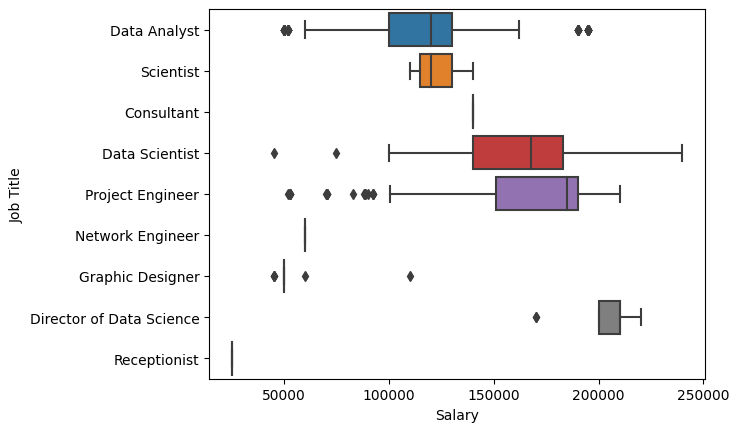

In [ ]:
# Visualization some job title ti see what relationship betwee job title to salary
filter_job = df[(df["Job Title"] == "Scientist")|
                (df["Job Title"] == "Data Analyst")|
                (df["Job Title"] == "Consultant")|
                (df["Job Title"] == "Data Scientist")|
                (df["Job Title"] == "Project Engineer")|
                (df["Job Title"] == "Graphic Designer")|
                (df["Job Title"] == "Network Engineer")|
                (df["Job Title"] == "Receptionist")|
                (df["Job Title"] == "Director of Data Science")]
filter_job
sns.boxplot(data = filter_job, x = "Salary", y ='Job Title')


The boxplot displaying salary distributions for selected job titles provides these insights:

Roles like 'Data Scientist' and 'Consultant' have a higher median salary compared to other titles like 'Graphic Designer' and 'Receptionist'.

There is considerable variation in salaries within each job title, as indicated by the size of the boxes, which implies a wide range of compensation within the same role.

Outliers are present across several job titles, suggesting that there are exceptional salary instances that significantly deviate from the average range for those positions.

The 'Director of Data Science' role, although having fewer data points, seems to have a higher salary range, consistent with senior-level positions in the field.

In [ ]:
# Check if employees working in diffence job is less than three employee
df_job_title = df.groupby(["Job Title"])["Job Title"].filter(lambda x: len(x) < 4).value_counts()
df_job_title.index.tolist()


['Manager',
 'Scientist',
 'IT Support',
 'Director of Finance',
 'Administrative Assistant',
 'Business Operations Analyst',
 'IT Consultant',
 'Training Specialist',
 'IT Manager',
 'Event Coordinator',
 'Customer Service Manager',
 'Copywriter',
 'Director of Engineering',
 'Social Media Specialist',
 'Engineer',
 'Network Engineer',
 'Director of Product Management',
 'Customer Success Manager',
 'Supply Chain Analyst',
 'Principal Engineer',
 'Web Designer',
 'Customer Support Specialist',
 'Quality Assurance Analyst',
 'Chief Data Officer',
 'Director of Sales and Marketing',
 'Director of Business Development',
 'Director of Human Capital',
 'Advertising Coordinator',
 'Data Entry Clerk',
 'Software Architect',
 'Digital Content Producer',
 'Public Relations Manager',
 'Strategy Consultant',
 'Supply Chain Manager',
 'Principal Scientist',
 'Designer',
 'Chief Technology Officer',
 'Director',
 'Technical Support Specialist',
 'Developer',
 'UX Researcher',
 'Consultant',
 'CEO'

In [ ]:
# Get list of index from df_job_title
df_job_title_column = df_job_title.index.tolist()

In [ ]:
len(df_job_title_column)

48

<Axes: >

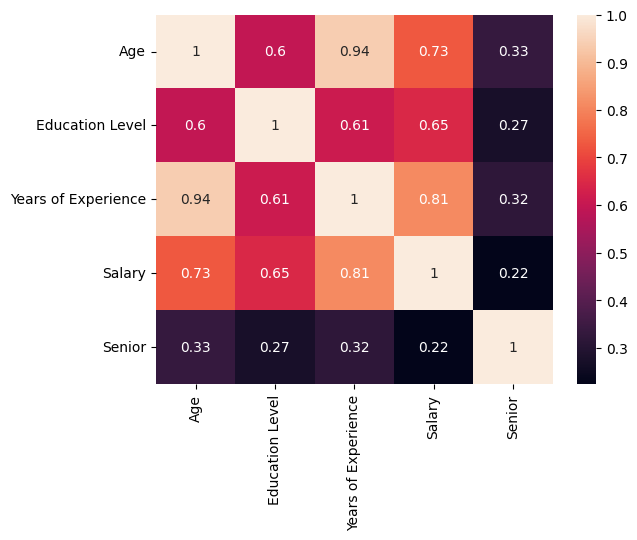

In [ ]:
sns.heatmap(df[numerical_column].corr(), annot = True)

**Strong Positive Correlations:** There are strong positive correlations between 'Years of Experience' and 'Age', which is expected as more years in the workforce typically correlate with older age.

**Salary Correlations:** 'Salary' has a notable positive correlation with both 'Years of Experience' and 'Education Level', suggesting that higher education and more experience are associated with higher pay.

**Moderate Correlations:** The 'Senior' variable has moderate positive correlations with 'Salary', 'Years of Experience', and 'Age', indicating that senior roles are often associated with more experience, older age, and higher salaries.

**Lesser Correlations:** The 'Senior' variable has the lowest correlation with 'Education Level', suggesting that the designation of 'Senior' may not be as strongly dependent on formal education as it is on experience or age.

## Convert some categories into label

In [ ]:
# Convert gender category into label by label encoder
from sklearn.preprocessing import LabelEncoder
df_copy = df.copy()
gender = {"Male":0, "Female":1}
df_copy['Gender'] = df['Gender'].map(lambda x: gender[x])
df_copy.head(15)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,0,1,Software Engineer,5.0,90000,UK,White,0
1,28,1,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45,0,3,Manager,15.0,150000,Canada,White,1
3,36,1,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52,0,2,Director,20.0,200000,USA,Asian,0
5,29,0,1,Marketing Analyst,2.0,55000,USA,Hispanic,0
6,42,1,2,Product Manager,12.0,120000,USA,Asian,0
7,31,0,1,Sales Manager,4.0,80000,China,Korean,0
8,26,1,1,Marketing Coordinator,1.0,45000,China,Chinese,0
9,38,0,3,Scientist,10.0,110000,Australia,Australian,1


In [ ]:
df_copy['Race'].unique()

array(['White', 'Hispanic', 'Asian', 'Korean', 'Chinese', 'Australian',
       'Welsh', 'African American', 'Mixed', 'Black'], dtype=object)

In [ ]:
# Convert category of country and race into labels by one-hot encoder
df_copy = pd.get_dummies(df_copy, columns = ['Country', 'Race'], drop_first=True)
df_copy.head(15)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Senior,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,32,0,1,Software Engineer,5.0,90000,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,28,1,2,Data Analyst,3.0,65000,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,45,0,3,Manager,15.0,150000,1,1,0,0,0,0,0,0,0,0,0,0,0,1
3,36,1,1,Sales Associate,7.0,60000,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,52,0,2,Director,20.0,200000,0,0,0,0,1,1,0,0,0,0,0,0,0,0
5,29,0,1,Marketing Analyst,2.0,55000,0,0,0,0,1,0,0,0,0,1,0,0,0,0
6,42,1,2,Product Manager,12.0,120000,0,0,0,0,1,1,0,0,0,0,0,0,0,0
7,31,0,1,Sales Manager,4.0,80000,0,0,1,0,0,0,0,0,0,0,1,0,0,0
8,26,1,1,Marketing Coordinator,1.0,45000,0,0,1,0,0,0,0,0,1,0,0,0,0,0
9,38,0,3,Scientist,10.0,110000,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
len(df_copy['Job Title'].unique())

104

In [ ]:
# To make analysist simpler, convert job titles containing less than 5 employees
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_copy.drop(['Country_Canada','Country_China','Country_UK', 'Country_USA', 'Race_Asian',
                    'Race_Australian', 'Race_Black', 'Race_Chinese', 'Race_Hispanic', 'Race_Korean',
                    'Race_Mixed', 'Race_Welsh', 'Race_White'], axis = 1, inplace = True)
df_copy['Job Title'] = df_copy['Job Title'].map(lambda x: "Other" if x in df_job_title_column else x)
df_copy['Full Job Title'] = df_copy['Job Title'] # Keep original column for classifying type of job
df_copy['Full Job Title Order'] = labelencoder.fit_transform(df_copy['Full Job Title'])
df_copy = pd.get_dummies(df_copy, columns = ['Job Title'], drop_first=False)
df_copy.head(15)

,Age,Gender,Education Level,Years of Experience,Salary,Senior,Full Job Title,Full Job Title Order,Job Title_Account Manager,Job Title_Accountant,...,Job Title_Sales Director,Job Title_Sales Executive,Job Title_Sales Manager,Job Title_Sales Representative,Job Title_Social Media Manager,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Manager,Job Title_UX Designer,Job Title_Web Developer
0,32,0,1,5.0,90000,0,Software Engineer,53,0,0,...,0,0,0,0,0,0,1,0,0,0
1,28,1,2,3.0,65000,0,Data Analyst,8,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45,0,3,15.0,150000,1,Other,35,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36,1,1,7.0,60000,0,Sales Associate,46,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52,0,2,20.0,200000,0,Other,35,0,0,...,0,0,0,0,0,0,0,0,0,0
5,29,0,1,2.0,55000,0,Marketing Analyst,26,0,0,...,0,0,0,0,0,0,0,0,0,0
6,42,1,2,12.0,120000,0,Product Manager,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,31,0,1,4.0,80000,0,Sales Manager,49,0,0,...,0,0,1,0,0,0,0,0,0,0
8,26,1,1,1.0,45000,0,Marketing Coordinator,27,0,0,...,0,0,0,0,0,0,0,0,0,0
9,38,0,3,10.0,110000,1,Other,35,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_copy[['Age',	'Gender', 'Education Level', 'Years of Experience',
         'Salary',	'Senior', 'Full Job Title Order']]

,Age,Gender,Education Level,Years of Experience,Salary,Senior,Full Job Title Order
0,32,0,1,5.0,90000,0,53
1,28,1,2,3.0,65000,0,8
2,45,0,3,15.0,150000,1,35
3,36,1,1,7.0,60000,0,46
4,52,0,2,20.0,200000,0,35
...,...,...,...,...,...,...,...
6679,49,1,3,20.0,200000,0,28
6680,32,0,0,3.0,50000,0,46
6681,30,1,1,4.0,55000,0,17
6682,46,0,2,14.0,140000,0,29


<Axes: >

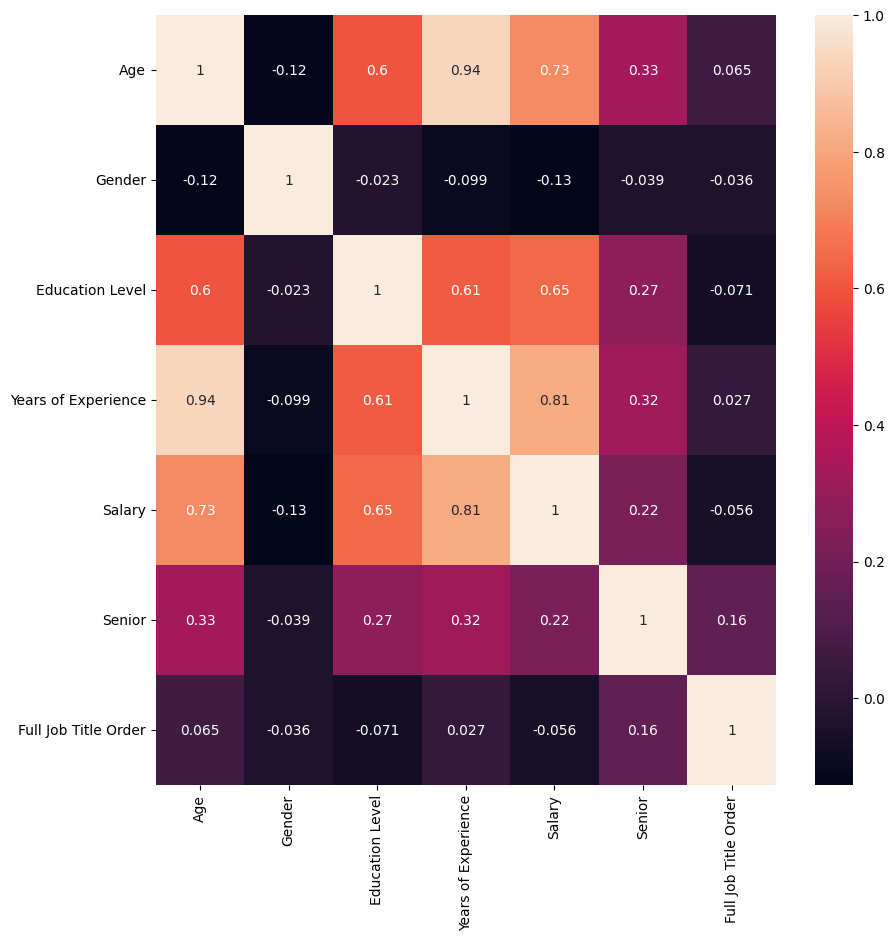

In [ ]:
# display correlation
plt.figure(figsize = (10,10))
sns.heatmap(df_copy[['Age',	'Gender', 'Education Level', 'Years of Experience',
                     'Salary',	'Senior', 'Full Job Title Order']].corr()
                     , annot = True)

The correlation heatmap after encoding categorical variables and standardizing job titles shows:

**Age and Experience:** A very strong positive correlation (0.94) between 'Age' and 'Years of Experience', which is expected as more years in the workforce typically correlate with older age.

**Salary Correlations:** 'Salary' shows strong positive correlations with 'Years of Experience' (0.81) and 'Education Level' (0.65), suggesting that higher education and more experience are generally associated with higher pay.

**Seniority:** 'Senior' has a moderate correlation with 'Salary' (0.22), indicating that senior roles tend to offer higher pay, but the correlation is not as strong as 'Years of Experience' or 'Education Level'.

**Gender Disparity:** 'Gender' has a very small negative correlation with 'Salary' (-0.13), suggesting a potential gender pay gap where males might be earning slightly more on average than females.

**Full Job Title Order:** This new feature representing the encoded job titles does not show a significant correlation with 'Salary' (-0.056), indicating that the job title alone, without considering other factors, may not be a strong predictor of salary.

# 3. Feature Engineering

In [ ]:
# Categorize type of job title into 7 groups

hr = ['Human Resources Specialist', 'Customer Success Manager', 'Customer Support Specialist', 'Public Relations Manager', 'Director of Sales and Marketing',
      'HR Specialist', 'Sales Operations Manager', 'Customer Service Rep', 'Human Resources Director', 'Technical Recruiter', 'Customer Success Rep',
      'Director of Human Capital', 'Customer Service Manager', 'Event Coordinator', 'Administrative Assistant', 'Director of Human Resources', 'Recruiter',
      'Juniour HR Generalist', 'Juniour HR Coordinator', 'HR Manager', 'Project Coordinator', 'Customer Service Representative', 'HR Coordinator',
      'Human Resources Coordinator', 'Receptionist', 'Director of HR', 'HR Generalist', 'Human Resources Manager']
design = ['Advertising Coordinator', 'Creative Director', 'Designer', 'Digital Content Producer', 'Product Development Manager', 'Social Media Man',
        'Social Media Specialist', 'Social Media Manager', 'Graphic Designer', 'Marketing Director', 'Product Marketing Manager', 'Content Marketing Manager',
        'Product Designer']
management = ['CEO', 'Office Manager', 'Director', 'Manager']
engineer = ['Principal Engineer', 'Director of Engineering', 'Engineer', 'Project Manager', 'Project Engineer']
technical = ['IT Manager', 'IT Project Manager', 'IT Support', 'Chief Technology Officer', 'Network Engineer', 'Principal Scientist','Quality Assurance Analyst',
        'Researcher','Web Designer', 'Chief Data Officer', 'Software Architect', 'Software Manager', 'Data Entry Clerk', 'Software Project Manager', 'Developer',
        'Help Desk Analyst','Technical Writer', 'UX Researcher', 'IT Consultant', 'Copywriter', 'IT Support Specialist', 'Scientist', 'Data Engineer',
        'UX Designer', 'Director of Data Science', 'Research Director', 'Research Scientist', 'Web Developer', 'Software Developer', 'Back end Developer',
        'Front end Developer', 'Full Stack Engineer', 'Software Engineer Manager', 'Data Analyst', 'Data Scientist', 'Software Engineer']
business = ['Account Executive', 'Director of Business Development', 'Director of Product Management', 'Strategy Consultant', 'Director of Sales',
            'Supply Chain Analyst', 'Supply Chain Manager', 'Consultant', 'Technical Support Specialist', 'Business Intelligence Analyst', 'VP of Finance',
            'Director of Finance', 'Business Operations Analyst', 'Account Manager', 'Business Development Manager', 'Financial Advisor', 'Accountant',
            'Business Development Associate', 'Marketing Specialist', 'Digital Marketing Specialist', 'Business Analyst', 'Sales Executive',
            'Digital Marketing Manager', 'Financial Analyst', 'Sales Manager', 'Sales Director', 'Sales Representative', 'Director of Marketing',
            'Financial Manager', 'Marketing Analyst', 'Marketing Coordinator', 'Sales Associate', 'Marketing Manager', 'Product Manager']
operation = ['Operations Director', 'VP of Operations', 'Training Specialist', 'Operations Coordinator', 'Delivery Driver', 'Operations Analyst',
             'Director of Operations', 'Operations Manager']

In [ ]:
# create function for categorizing job_title
def categorize_job_title(x):
    if x in technical:
        return 'technical'
    elif x in design:
        return 'design'
    elif x in management:
        return 'management'
    elif x in engineer:
        return 'engineer'
    elif x in hr:
        return 'hr'
    elif x in business:
        return 'business'
    else:
        return 'operation'

In [ ]:
df_copy['Job Title Type'] = df_copy['Full Job Title'].apply(categorize_job_title) # categorize job_title into 7 groups and keep in column 'type_title'
df_copy.head(20)

,Age,Gender,Education Level,Years of Experience,Salary,Senior,Full Job Title,Full Job Title Order,Job Title_Account Manager,Job Title_Accountant,...,Job Title_Sales Executive,Job Title_Sales Manager,Job Title_Sales Representative,Job Title_Social Media Manager,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Manager,Job Title_UX Designer,Job Title_Web Developer,Job Title Type
0,32,0,1,5.0,90000,0,Software Engineer,53,0,0,...,0,0,0,0,0,1,0,0,0,technical
1,28,1,2,3.0,65000,0,Data Analyst,8,0,0,...,0,0,0,0,0,0,0,0,0,technical
2,45,0,3,15.0,150000,1,Other,35,0,0,...,0,0,0,0,0,0,0,0,0,operation
3,36,1,1,7.0,60000,0,Sales Associate,46,0,0,...,0,0,0,0,0,0,0,0,0,business
4,52,0,2,20.0,200000,0,Other,35,0,0,...,0,0,0,0,0,0,0,0,0,operation
5,29,0,1,2.0,55000,0,Marketing Analyst,26,0,0,...,0,0,0,0,0,0,0,0,0,business
6,42,1,2,12.0,120000,0,Product Manager,37,0,0,...,0,0,0,0,0,0,0,0,0,business
7,31,0,1,4.0,80000,0,Sales Manager,49,0,0,...,0,1,0,0,0,0,0,0,0,business
8,26,1,1,1.0,45000,0,Marketing Coordinator,27,0,0,...,0,0,0,0,0,0,0,0,0,business
9,38,0,3,10.0,110000,1,Other,35,0,0,...,0,0,0,0,0,0,0,0,0,operation


<Axes: xlabel='Salary', ylabel='Job Title Type'>

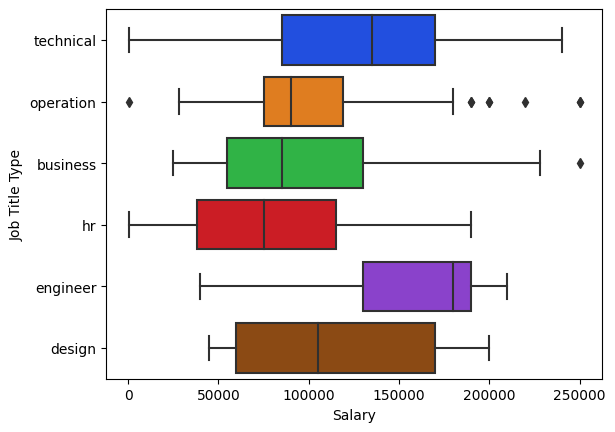

In [ ]:
sns.boxplot(data = df_copy, x = "Salary", y = "Job Title Type", palette = 'bright') # Display visualization from salary depending on type of job title

**Salary Variation by Role:** There is a clear variation in median salaries across different job title types. Some categories, like 'Technical' and 'Management', tend to have higher median salaries compared to others like 'HR' and 'Operation'.

**Range and Spread:** The range (as depicted by the whiskers) and the interquartile range (the box size) vary significantly among different job types. Wider boxes in certain categories, like 'Business' and 'Technical', suggest a broader range of salaries within these groups.

**Presence of Outliers:** The existence of outliers (indicated by points above or below the whiskers) in categories like 'Technical', 'Management', and 'Business' suggests that there are individuals in these categories earning significantly more than the typical range. This could be due to factors like seniority, specialized skills, or regional differences.

**Comparative Analysis:** Categories like 'Design' and 'HR' show lower median salaries and a narrower interquartile range, indicating less variability in salaries within these fields.

**Interpretation of 'Other':** The 'Other' category, which likely includes a mix of various unclassified job titles, shows a broad range in salary distribution, reflecting the diversity of roles it encompasses.

In [ ]:
# Convert categories of type of job title into label by mapping
job_title_type = {"hr":0, "design":1, "management":2, "engineer":3, "technical":4, "business":5, "operation":6}
df_copy['Job Title Type'] = df_copy['Job Title Type'].map(lambda x: job_title_type[x])
df_copy.head(15)

,Age,Gender,Education Level,Years of Experience,Salary,Senior,Full Job Title,Full Job Title Order,Job Title_Account Manager,Job Title_Accountant,...,Job Title_Sales Executive,Job Title_Sales Manager,Job Title_Sales Representative,Job Title_Social Media Manager,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Manager,Job Title_UX Designer,Job Title_Web Developer,Job Title Type
0,32,0,1,5.0,90000,0,Software Engineer,53,0,0,...,0,0,0,0,0,1,0,0,0,4
1,28,1,2,3.0,65000,0,Data Analyst,8,0,0,...,0,0,0,0,0,0,0,0,0,4
2,45,0,3,15.0,150000,1,Other,35,0,0,...,0,0,0,0,0,0,0,0,0,6
3,36,1,1,7.0,60000,0,Sales Associate,46,0,0,...,0,0,0,0,0,0,0,0,0,5
4,52,0,2,20.0,200000,0,Other,35,0,0,...,0,0,0,0,0,0,0,0,0,6
5,29,0,1,2.0,55000,0,Marketing Analyst,26,0,0,...,0,0,0,0,0,0,0,0,0,5
6,42,1,2,12.0,120000,0,Product Manager,37,0,0,...,0,0,0,0,0,0,0,0,0,5
7,31,0,1,4.0,80000,0,Sales Manager,49,0,0,...,0,1,0,0,0,0,0,0,0,5
8,26,1,1,1.0,45000,0,Marketing Coordinator,27,0,0,...,0,0,0,0,0,0,0,0,0,5
9,38,0,3,10.0,110000,1,Other,35,0,0,...,0,0,0,0,0,0,0,0,0,6


In [ ]:
df_copy["Starting_working_Year"] = df_copy["Age"] - df_copy["Years of Experience"]
df_copy

,Age,Gender,Education Level,Years of Experience,Salary,Senior,Full Job Title,Full Job Title Order,Job Title_Account Manager,Job Title_Accountant,...,Job Title_Sales Manager,Job Title_Sales Representative,Job Title_Social Media Manager,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Manager,Job Title_UX Designer,Job Title_Web Developer,Job Title Type,Starting_working_Year
0,32,0,1,5.0,90000,0,Software Engineer,53,0,0,...,0,0,0,0,1,0,0,0,4,27.0
1,28,1,2,3.0,65000,0,Data Analyst,8,0,0,...,0,0,0,0,0,0,0,0,4,25.0
2,45,0,3,15.0,150000,1,Other,35,0,0,...,0,0,0,0,0,0,0,0,6,30.0
3,36,1,1,7.0,60000,0,Sales Associate,46,0,0,...,0,0,0,0,0,0,0,0,5,29.0
4,52,0,2,20.0,200000,0,Other,35,0,0,...,0,0,0,0,0,0,0,0,6,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,49,1,3,20.0,200000,0,Marketing Director,28,0,0,...,0,0,0,0,0,0,0,0,1,29.0
6680,32,0,0,3.0,50000,0,Sales Associate,46,0,0,...,0,0,0,0,0,0,0,0,5,29.0
6681,30,1,1,4.0,55000,0,Financial Manager,17,0,0,...,0,0,0,0,0,0,0,0,5,26.0
6682,46,0,2,14.0,140000,0,Marketing Manager,29,0,0,...,0,0,0,0,0,0,0,0,5,32.0


<Axes: >

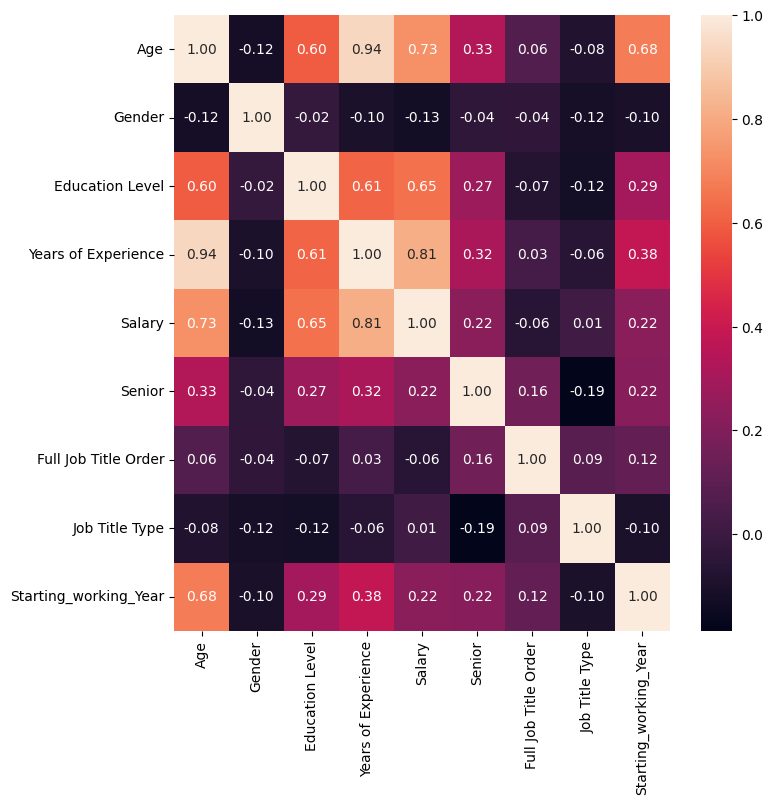

In [ ]:
# display correlation
plt.figure(figsize = (8,8))
sns.heatmap(df_copy[['Age',	'Gender', 'Education Level', 'Years of Experience',
                     'Salary',	'Senior', 'Full Job Title Order', 'Job Title Type', 'Starting_working_Year']].corr()
            , annot = True, fmt='.2f')

Years of Experience and Age: As expected, there is a strong positive correlation (0.94) between 'Age' and 'Years of Experience', indicating that they increase together.

Salary Correlations: 'Salary' shows significant positive correlations with 'Years of Experience' (0.81) and 'Education Level' (0.65), suggesting that experience and higher education are associated with higher salaries.

Seniority: 'Senior' status has a moderate positive correlation with 'Salary' (0.22), indicating that senior roles generally offer higher pay.

Gender Pay Gap: The correlation between 'Gender' and 'Salary' is slightly negative (-0.13), hinting at a potential gender-based pay disparity.

Job Title Type: The correlation between 'Job Title Type' and 'Salary' is 0.11, suggesting a modest relationship between job type and salary.

Starting Working Year: 'Starting_working_Year' (calculated as 'Age' minus 'Years of Experience') shows a strong correlation with 'Age' (0.82) but not as much with other factors.

## Predictive Power Score

<Axes: xlabel='x', ylabel='y'>

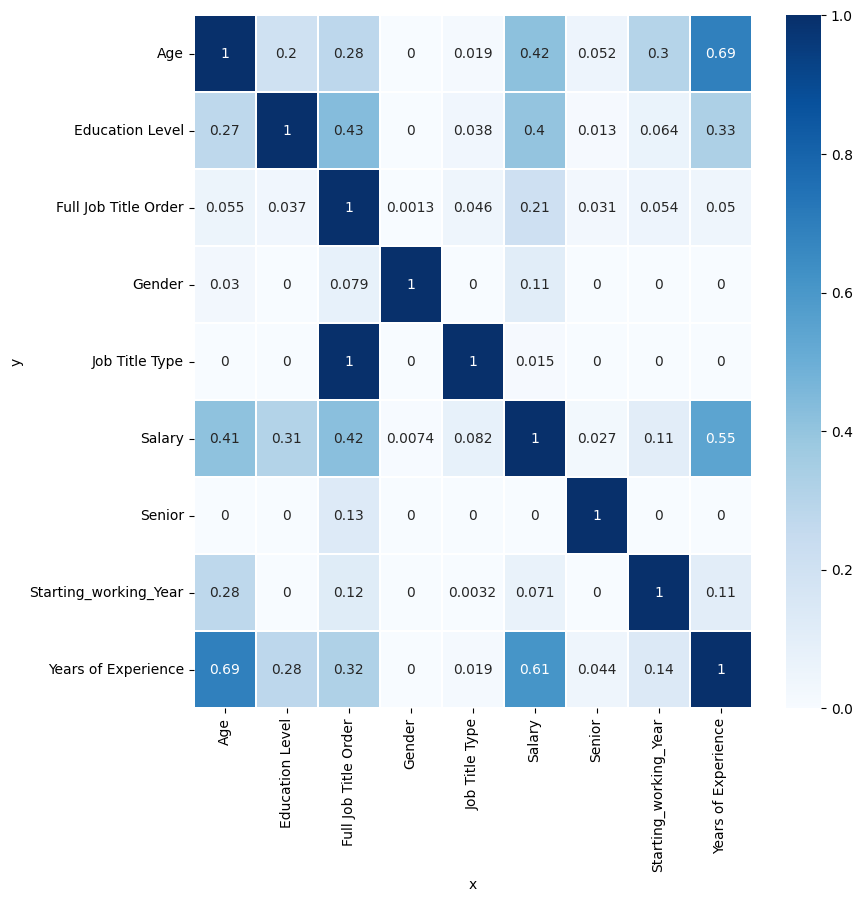

In [ ]:
dfcopy = df_copy[['Age','Gender','Education Level','Years of Experience',
                'Salary','Senior','Full Job Title Order','Job Title Type', 'Starting_working_Year']].copy()
matrix_df = ps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# plot
plt.figure(figsize = (9,9))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.25, annot=True)

Years of Experience as Predictor: 'Years of Experience' has a relatively strong PPS in predicting 'Age' (0.69), which is expected as typically age and experience are related.

Salary Predictors: 'Salary' shows moderate predictability with 'Age' (0.41), 'Education Level' (0.31), and 'Years of Experience' (0.42). This suggests that these factors can be moderately predictive of the salary, with experience being slightly more predictive.

Starting Working Year: 'Starting_working_Year' has the strongest relationship with 'Age' (0.69), indicating that it can be a good predictor of the age someone started working, which is a derived feature from 'Age' and 'Years of Experience'.

Weak Predictors: Many variables show very low PPS scores across the board, indicating that they have weak predictive power in relation to other variables. For instance, 'Gender' and 'Senior' have low PPS for predicting 'Salary'.

Job Title Predictability: The 'Full Job Title Order' and 'Job Title Type' have low PPS in predicting 'Salary', suggesting that job titles alone may not be strong predictors of salary without considering other factors.

Education Level and Age: 'Education Level' has a PPS of 0.28 in predicting 'Age', which could reflect a trend where certain age groups have attained a specific level of education.

No Predictive Power: Several pairs of variables show a PPS of 0, indicating no predictive power. For example, 'Senior' does not predict 'Education Level', 'Years of Experience', 'Gender', and others.

# 4. Feature Selection

From ppscore, the features chosen for modelling is 'Years of experience', 'Starting_working_year', 'Full Job_title_order', 'Education level' and 'Job  Type'. Age cannot be chosen since this feature can be correlated with years of experience.

In [ ]:
X = df_copy[['Years of Experience', 'Starting_working_Year', 'Full Job Title Order', 'Education Level', 'Job Title Type']]
y = np.log(df_copy['Salary'])

In [ ]:
print(X.shape, y.shape)

(6684, 5) (6684,)


In [ ]:
# Train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

# 5. Preprocessing

In [ ]:
X.head()

,Years of Experience,Starting_working_Year,Full Job Title Order,Education Level,Job Title Type
0,5.0,27.0,53,1,4
1,3.0,25.0,8,2,4
2,15.0,30.0,35,3,6
3,7.0,29.0,46,1,5
4,20.0,32.0,35,2,6


### Check null

In [ ]:
X_train.isna().sum()

Years of Experience      0
Starting_working_Year    0
Full Job Title Order     0
Education Level          0
Job Title Type           0
dtype: int64

In [ ]:
y_train.isna().sum()

0

In [ ]:
X_test.isna().sum()

Years of Experience      0
Starting_working_Year    0
Full Job Title Order     0
Education Level          0
Job Title Type           0
dtype: int64

In [ ]:
y_test.isna().sum()

0

In [ ]:
X_train

,Years of Experience,Starting_working_Year,Full Job Title Order,Education Level,Job Title Type
4825,4.0,26.0,29,1,5
1477,12.0,28.0,53,3,4
6562,16.0,27.0,6,3,1
4899,12.0,22.0,28,3,1
5309,3.0,25.0,36,1,1
...,...,...,...,...,...
5260,5.0,24.0,10,3,4
500,5.0,25.0,8,1,4
3885,1.0,24.0,52,1,4
4517,2.0,24.0,23,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_need_scaling = ["Years of Experience", "Starting_working_Year"]
X_train[columns_need_scaling] = scaler.fit_transform(X_train[columns_need_scaling])
X_train.head()

,Years of Experience,Starting_working_Year,Full Job Title Order,Education Level,Job Title Type
4825,-0.669491,0.158435,29,1,5
1477,0.663725,0.855534,53,3,4
6562,1.330332,0.506984,6,3,1
4899,0.663725,-1.235764,28,3,1
5309,-0.836142,-0.190115,36,1,1


In [ ]:
X_test[columns_need_scaling] = scaler.transform(X_test[columns_need_scaling])

<Axes: xlabel='Salary'>

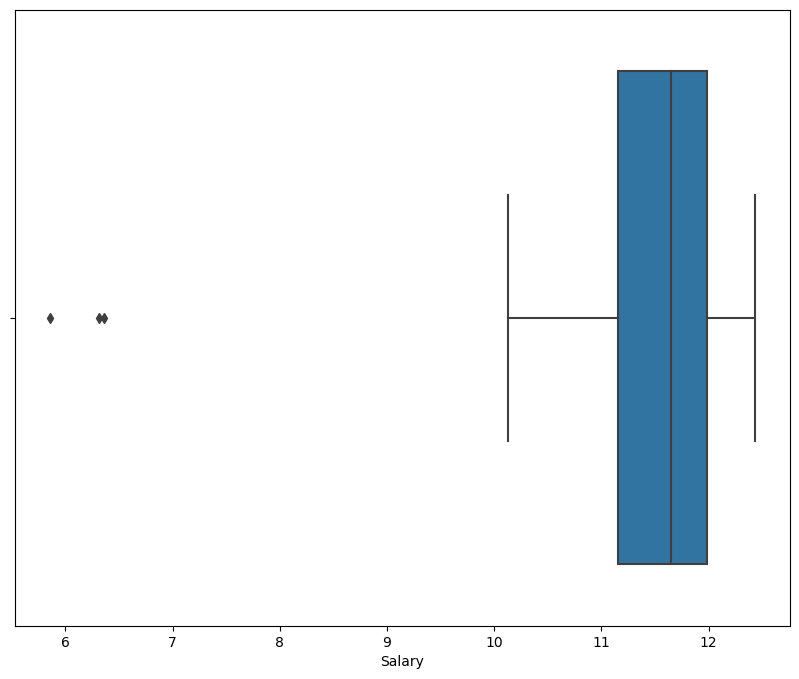

In [ ]:
plt.figure(figsize  =(10,8))
sns.boxplot(x = y_train)

In [ ]:
X_test.head()

,Years of Experience,Starting_working_Year,Full Job Title Order,Education Level,Job Title Type
1388,-0.169535,-0.538665,20,2,4
6213,0.163769,-0.538665,29,2,5
1381,0.163769,0.855534,53,2,4
4060,-0.502839,-0.538665,52,1,4
3757,0.330421,0.506984,29,2,5


# 6. Model Selection

In [ ]:
! pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.7 MB/s eta 0:01:01
   ---------------------------------------- 0.2/99.8 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 0.4/99.8 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 1.1/99.8 MB 7.2 MB/s eta 0:00:14
    --------------------------------------- 2.4/99.8 MB 11.9 MB/s eta 0:00:09
   - -------------------------------------- 4.4/99.8 MB 16.5 MB/s eta 0:00:06
   -- ------------------------------------- 6.2/99.8 MB 19.7 MB/s eta 0:00:05
   -- ------------------------------------- 6.3/99.8 MB 17.4 MB/s eta 0:00:06
   --- ------------------------------------ 7.7/99.8 MB 18.9 MB/s eta 0:00:05
   --- --------------------

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold


# Models to be considered
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Random Forest', RandomForestRegressor()),
    ('Support Vector Machine', SVR()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoosting', XGBRegressor())
]

# Number of splits for cross-validation
n_splits = 5

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define parameter grids for each model
param_grid = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 1, 10]},
    'Lasso Regression': {'alpha': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'XGBoosting': {'learning_rate': [0.01, 0.05, 0.1],'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}}


In [ ]:
# Results dictionary to store the best parameters and scores
results = {}

# Best models and their parameters
best_models = {}

# Perform grid search for each model
for model_name, model in models:
    parameters = param_grid[model_name]

    # Grid search for mean squared error
    grid_search_mse = GridSearchCV(model, parameters, cv=kf, scoring='neg_mean_squared_error')
    grid_search_mse.fit(X_train, y_train)

    # Grid search for R²
    grid_search_r2 = GridSearchCV(model, parameters, cv=kf, scoring='r2')
    grid_search_r2.fit(X_train, y_train)

    # Store the best parameters and scores
    results[model_name] = {
        'Best Parameters (MSE)': grid_search_mse.best_params_,
        'Best Mean MSE': (-grid_search_mse.best_score_),
        'Best Parameters (R2)': grid_search_r2.best_params_,
        'Best R2': grid_search_r2.best_score_
    }

    # Store the best model
    best_models[model_name] = grid_search_mse.best_estimator_

# Print the information of all models
for model_name, result in results.items():
    print(f"{model_name} - Best Parameters (MSE): {result['Best Parameters (MSE)']}; Best Mean MSE: {result['Best Mean MSE']}; Best Parameters (R2): {result['Best Parameters (R2)']}; Best R2: {result['Best R2']}")

# Identify the best model based on R² or another metric
best_model_name = max(results, key=lambda key: results[key]['Best R2'])
best_model = best_models[best_model_name]

# Train the best model on the entire training dataset
best_model.fit(X_train, y_train)


Linear Regression - Best Parameters (MSE): {}; Best Mean MSE: 0.11148318247053668; Best Parameters (R2): {}; Best R2: 0.6545953995129896
Ridge Regression - Best Parameters (MSE): {'alpha': 0.1}; Best Mean MSE: 0.11148318269536028; Best Parameters (R2): {'alpha': 1}; Best R2: 0.6545955237705228
Lasso Regression - Best Parameters (MSE): {'alpha': 0.1}; Best Mean MSE: 0.13194368019582528; Best Parameters (R2): {'alpha': 0.1}; Best R2: 0.5905191679306815
Random Forest - Best Parameters (MSE): {'max_depth': None, 'n_estimators': 200}; Best Mean MSE: 0.026174106828918842; Best Parameters (R2): {'max_depth': 20, 'n_estimators': 200}; Best R2: 0.9208514535231688
Support Vector Machine - Best Parameters (MSE): {'C': 10, 'kernel': 'rbf'}; Best Mean MSE: 0.07603952109600197; Best Parameters (R2): {'C': 10, 'kernel': 'rbf'}; Best R2: 0.7653852839210336
Gradient Boosting - Best Parameters (MSE): {'max_depth': 10, 'n_estimators': 50}; Best Mean MSE: 0.03255417769393505; Best Parameters (R2): {'max_d

RandomForestRegressor(n_estimators=200)

In [ ]:
import joblib
# Save the model and scaler to files
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# 7. Testing

In [ ]:
# Make predictions on the testing dataset using the best model
y_pred = np.exp(best_model.predict(X_test)) # Convert prediction value to original scale
y_test = np.exp(y_test) # Convert test value to original scale

# Evaluate the performance of the model on the testing dataset
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate Mean Squared Error (MSE) and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) on Testing Data: {mse}")
print(f"Mean Absolute Error (MAE)  on Testing Data: {mae}")
print(f"R² Score on Testing Data: {r2}")


Mean Squared Error (MSE) on Testing Data: 80929251.64178285
Mean Absolute Error (MAE)  on Testing Data: 3600.24949501939
R² Score on Testing Data: 0.9704018265520552


# 8. Inference

In [ ]:
print(X.iloc[55])
print(np.exp(y.iloc[55]))

Years of Experience       9.0
Starting_working_Year    27.0
Full Job Title Order     49.0
Education Level           1.0
Job Title Type            5.0
Name: 55, dtype: float64
95000.00000000006


In [ ]:
import joblib
import numpy as np

# Load the model and scaler from files
loaded_model = joblib.load('best_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Take user input for Years of Experience
years_of_experience = 9

# Assuming other features remain constant
job_title_order = 49
education_level = 1
type_title = 5
starting_working_year = 27.0

# Create a NumPy array with the input features
input_features = np.array([[years_of_experience, starting_working_year, job_title_order, education_level, type_title]])

# Scale only the "Years of Experience" feature using the loaded scaler
input_features[:, 0:2] = loaded_scaler.transform(input_features[:, 0:2].reshape(-1, 2)).flatten()

# Make predictions using the loaded model
predicted_salary = loaded_model.predict(input_features)

# Print or use the prediction as needed
print("Predicted Salary:",np.exp( predicted_salary[0]))


Predicted Salary: 127530.20587277642


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
